<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Modelado de Temas

Este *cuaderno* trata sobre modelado de temas o tópicos a partir de datos de texto. El objetivo del *cuaderno* es que usted obtenga una visión general del modelo de asignación latente de Dirichlet (LDA, por sus siglas en inglés). Busca también que sea capaz de crear e implementar este modelo en `Python` y que sea  capaz de evaluar e interpretar los resultados, y de identificar el mejor modelo de temas para un determinado problema. 

**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

Todo texto presenta una variedad de temas o tópicos que se expresan a través  de palabras. El modelado de temas es una faceta del procesamiento del lenguaje natural (NLP, por sus siglas en inglés). Como vimos anteriormente, utilizar el lenguaje, textos, como datos puede ser extremadamente poderoso. 

En este *cuaderno* nos centraremos sobre el modelado de temas. Inmediatamente nos surge la pregunta ¿qué son los temas? Responderemos esa pregunta con un ejemplo. Habremos notado que en los días en que se llevan a cabo eventos importantes (como elecciones nacionales, desastres naturales o eventos deportivos), las publicaciones de las redes sociales tienden a centrarse en esos eventos. Las publicaciones de alguna manera reflejan los eventos del día, y lo hacen de diferentes formas. Las publicaciones pueden tener, puntos de vista divergentes que permiten que las agrupemos en grupos o clústeres de temas. Por ejemplo, la siguiente figura con un breve texto sobre ciencia de datos muestra cómo se pueden identificar palabras y asignarlas a temas.

<center>
<img src = "figs/topicos1.jpeg" alt = "topicos" style = "width: 500px;"/>
</center>


En  la figura se muestra cómo palabras como *información*, *predicción*, y *estadística*, son asignadas al tema modelado; mientras que *computacional*, *producción* y *escala* son asignadas al tema ingeniería. Los modelos de temas son importantes porque ofrecen la misma función para los datos textuales que las estadísticas clásicas para los datos numéricos. Es decir, proporcionan un resumen significativo de los datos. 

Los modelos de temas entran en la categoría de aprendizaje no supervisado porque, casi siempre, no se conocen de antemano los temas subyacentes de los documentos. Por lo tanto, no existe una variable que guíe el aprendizaje. En términos de aprendizaje no supervisado, los modelos de temas se pueden pensar como parte del análisis de clusters, más específicamente a K-medias. Recordemos que con K-medias, primero se establece el número de clusters y luego el modelo asigna cada uno de los datos a uno de los clústers predeterminados. Lo mismo ocurre generalmente con los modelos de temas. Seleccionamos el número de temas al inicio y luego el modelo aísla las palabras que forman esa cantidad de temas. 

Los modelos de temas buscan entonces identificar los temas subyacentes en una colección de documentos (también referidos como corpus), utilizando las palabras contenidas en los mismos.  Para ello asumen que las palabras en el mismo documento están relacionadas y usan esa suposición para definir temas abstractos al encontrar grupos de palabras que aparecen con frecuencia una cerca de otra.  Por ejemplo, si una oración contiene las palabras *salario*, *empleado*, y *reunión*, podemos asumir que esa oración trata sobre trabajo.

Este tipo de algoritmos por lo general pretenden primero determinar el número de temas, luego identificar palabras o frases concurrentes en los documentos; y a partir de esto, buscar clusters de palabras que caracterizan el documento y finalmente retornar un conjunto de temas abstractos que caracterizan el corpus.

Un aspecto clave de los modelos de temas es que no producen tópicos específicos de una palabra o una frase, sino un conjunto de palabras, cada una de las cuales representa un tema abstracto. Esto se debe a que los modelos de temas entienden la proximidad de las palabras, no el contexto. Por ejemplo, en la figura siguiente, el modelo no tiene idea de lo que significan *ala*, *elevar*, *piloto*, *equipaje*, *pasajero*, o *mosca*; sólo sabe que estas palabras, generalmente, siempre que aparecen, aparecen muy próximas entre sí. Será nuestra tarea darle una interpretación (o no) a este tópico.

<center>
<img src = "figs/topicos3.jpeg" alt = "topicos3" style = "width: 500px;"/>
</center>

Existen varios algoritmos de modelado de temas, pero quizás el más conocidos es el de asignación latente de Dirichlet, o Latent Dirichlet Allocation (LDA) en inglés. En este *cuaderno* nos centraremos en este.

## Asignación Latente de Dirichlet (LDA)

En 2003, David Blei, Andrew Ng, y Michael Jordan publicaron un artículo sobre el algoritmo del modelado de temas conocido como Latent Dirichlet Allocation (LDA). LDA es un modelo probabilístico generativo, esto significa que el proceso de modelado comienza con el texto y funciona como ingeniería reversa a través del proceso que suponemos que lo generó, con el fin de identificar los parámetros de interés. En este caso, son los temas que generaron los datos que son de interés. 

Esencialmente LDA es una técnica de clustering que puede ser aplicada a colecciones de datos discretos como los son los documentos de texto. LDA es un modelo bayesiano jerárquico de 3 niveles en donde cada elemento o palabra de un texto se modela como una mezcla finita de temas. A su vez, cada tópico se modela como una combinación infinita de palabras. 

Esta técnica de aprendizaje no supervisado se diferencia de las técnicas de clustering estudiadas anteriormente porque en este caso cada observación pertenece a más de un grupo, donde la pertenencia de un elemento a un grupo se modela como una distribución de probabilidades.

### Set-up del modelo

LDA representa los documentos como una mezcla de temas que generan palabras con ciertas probabilidades. Asume  que los documentos se generan siguiendo un proceso definido. Al empezar a escribir un documento:

1. Decidimos el número de palabras que el documento tendrá, que surge de una distribución de Poisson.
2. Elegimos la mezcla de temas del documento, esta mezcla surge de una distribución de Dirichlet sobre un conjunto fijo de K temas. Usando el ejemplo anterior, podríamos elegir que el documento consista 1/3 sobre aviones y 2/3 sobre automóviles. Intuitivamente, cuando utilizamos la distribución de Dirichlet estamos suponiendo que los documentos dentro del corpus se distribuirían a lo largo del simplex en donde cada vértice se representa un tema. Luego, cada documento se ubicaría más cercano a los vértices que representan los temas contenidos en él. Por ejemplo, supongamos que tenemos 7 documentos y 3 temas posibles (aviones, automóviles y barcos), podríamos representar los documentos dentro del simplex  de la siguiente manera:

<center>
<img src = "figs/Triangulo.png" alt = "LDA" style = "width: 500px;"/>
</center>

   De esta manera podríamos ver que cada documento es una combinación de temas. El documento 1 sería 100% sobre aviones, el documento 2 sería 50% sobre aviones y 50% sobre automóviles, el documento 5 sería 100% sobre barcos, etc.


3. Generamos cada palabra en el documento siguiendo el siguiente esquema:
    
    3.1. Elegimos un tema, de acuerdo con la distribución multinomial que obtuvimos en el paso anterior, por ejemplo, podemos elegir el tópico de aviones con probabilidad 1/3 y el tópico de automóviles con 2/3.
    
    3.2 Usando el tópico generamos la palabra (de acuerdo con la distribución multinomial). Por ejemplo, si seleccionamos el tema de aviones, podríamos generar la palabra “piloto” con probabilidad del 20%, y “equipaje” con probabilidad del 10%, y así sucesivamente.

Formalmente, definimos una palabra como un ítem de un vocabulario indexado por $\{1, \cdots, V\}$. Las palabras se representan  mediante vectores de base uno, es decir, un vector donde sólo un elemento es 1 y el resto son 0. Así, usando superíndices para denotar componentes, la v-ésima palabra en el vocabulario se representa mediante un V-vector $w$ tal que $w^v = 1$ y $w^u = 0$ para $u\neq v$. Un *documento* es una secuencia de $N$ palabras denotadas por $\mathbf{w}=(w_1,w_2,\cdots,w_N)$, en donde $w_n$ es la n-ésima palabra de la secuencia. Un *corpus* es una colección de $M$ documentos denotados por $\mathbf{D}=(\mathbf{w_1},\mathbf{w_2},\cdots,\mathbf{w_m})$.

Así, para cada documento del corpus $D$, LDA supone los siguientes pasos que generan cada documento:

1. Decidimos $N\sim Poisson(\xi)$, donde $N$ son palabras del documento que surgen de un proceso de Poisson  con parámetro $\xi$
2. Elegimos  $\theta\sim Dir(\alpha)$ donde $\theta$  es la distribución de temas que asumimos surgen de una distribución Dirichlet con $K$ categorías.
3. Generamos $N$ palabras, $w_n$:

    3.1. Elegimos un tópico $z_n\sim Multinomial(\theta)$, de una distribución multinomial con parámetro $\theta$
  
    3.2 Usando el tópico generamos $w_n$ de $p(w_n|z_n, \beta)$


Estos 3 pasos se repiten para cada documento en el corpus.

Es importante que notemos que este modelo inicial cuenta con algunas simplificaciones:   

  - En primer lugar, la dimensionalidad $K$ de la distribución Dirichlet (y por consiguiente la dimensionalidad de la variable de los temas $z$) se supone fija y conocida. 
  - Segundo, las probabilidades de cada palabra son parametrizadas por una matriz $\beta$ de tamaño $K \times V$ en donde $\beta_{ij}=p(w^j = 1|z^i = 1)$, que trataremos como una cantidad fija que será estimada. 

Tomando como dados los parámetros $\alpha$ y $\beta$, la distribución de probabilidad conjunta de una mezcla de temas $\theta$, un conjunto de $N$ temas $\mathbf{z}$ y un conjunto de $N$ palabras $\mathbf{w}$ esta dada por:

$$p(\theta, \mathbf{z}, \mathbf{w}|\alpha, \beta) = p(\theta|\alpha)\prod_{n=1}^N p(z_n|\theta)p(w_n|z_n, \beta)$$

Notemos que el lado izquierdo de esta ecuación ($p(\theta, \mathbf{z}, \mathbf{w}|\alpha, \beta)$) corresponde a la probabilidad de que un documento $x$ aparezca en nuestro corpus. De este modo, nuestro objetivo será estimar $\alpha$ y $\beta$ de modo que se maximice la probabilidad de encontrar nuestra muestra de documentos.

Podemos representar la solución LDA a través de una gráfica, que nos permitirá entender un poco mejor la intuición detrás del problema: 

<center>
<img src = "figs/topicos4.jpeg" alt = "LDA1" style = "width: 500px;"/>
</center>


Las cajas son "placas" que utilizamos  para representar los 2 pasos iterativos del proceso. Dado que el proceso lo ejecutamos para cada documento del corpus, la placa externa (etiquetada como M) representa la iteración sobre cada documento. Mientras que, la iteración sobre palabras en el Paso 3 está representada por la placa  interna del diagrama, etiquetada como N. Los círculos representan los parámetros, las distribuciones y los resultados. El círculo etiquetado como W es la palabra seleccionada, que es el único dato conocido y, como tal, se utiliza para realizar "ingeniería inversa" en el proceso. Además de W, las otras 4 variables en el diagrama se definen de la siguiente manera:

- $\alpha$: hiperparámetro del documento del tópico para la distribución de Dirichlet.
- $\beta$: distribución de palabras para cada tópico.
- $z$: variable latente del tópico.
- $\theta$: variable latente para la distribución de temas de cada documento.

$\alpha$ y $\beta$ controlan la frecuencia de temas de los documentos y la frecuencia de palabra en los temas. Si $\alpha$ aumenta, los documentos se vuelven cada vez más similares a medida que aumenta el número de temas en cada documento. Por otro lado, si $\alpha$ disminuye, los documentos se vuelven cada vez más disímiles a medida que disminuye el número de temas en cada documento. 

El parámetro $\beta$  se comporta de manera similar. Si $\beta$ aumenta, se usan más palabras del documento para modelar un tema, mientras que un valor más bajo hace que se use una cantidad menor de palabras para un temas. Dada la complejidad de las distribuciones en LDA, no existe una solución directa, por lo que se requiere algún tipo de algoritmo de aproximación para generar los resultados. 

### Inferencia variacional

El principal desafío  de este modelo es el cálculo de la distribución posterior:

$$p(\theta, \mathbf{z}|\mathbf{w},\alpha, \beta)=\frac{p(\theta, \mathbf{z}, \mathbf{w}|\alpha, \beta)}{p(\mathbf{w}|\alpha, \beta)}$$

Desafortunadamente, esta distribución no se puede calcular directamente, por ende se debe aproximar numéricamente. La inferencia variacional es uno de los algoritmos de aproximación más simples, pero tiene una derivación extensa que requiere un conocimiento significativo de la probabilidad y es material para cursos más avanzados.

Sin embargo, en este *cuaderno* describiremos la intuición detrás de un algoritmo variacional simple basado en la convexidad. 

#### Intuición


La intuición detrás de la inferencia variacional es que, si la distribución real es intratable, entonces se debe encontrar una distribución más simple, muy cercana a la distribución verdadera, que es manejable, para que la inferencia sea posible. En otras palabras, dado que es imposible inferir la distribución real debido a su  complejidad, buscamos encontrar una distribución más simple que sea una buena aproximación de la distribución real.


<center>
<img src = "figs/topicos5.jpeg" alt = "LDA1" style = "width: 500px;"/>
</center>



La inferencia variacional es como tratar de ver animales en un zoológico lleno de gente. Los animales del zoológico están en un hábitat cerrado que, en este ejemplo, es la distribución posterior. Los visitantes en realidad no pueden ingresar al hábitat, por lo que los visitantes deben conformarse con ver el hábitat desde la posición más cercana posible, que es la aproximación posterior (es decir, la mejor aproximación del hábitat). Si hay mucha gente en el zoológico, puede ser difícil llegar a ese punto de vista óptimo. La gente generalmente comienza en la parte de atrás de la multitud y avanza estratégicamente hacia ese punto de vista óptimo. El paso de los visitantes desde la parte trasera de la multitud al punto de vista óptimo es el camino de optimización. La inferencia variacional es simplemente el proceso de acercarse lo mejor posible al punto deseado sabiendo que en realidad no se puede alcanzar el punto deseado.

Con la intuición  desarrollada veamos una aplicación en `Python`.

## LDA en `Python`


Ilustremos ahora la implementación de LDA en `Phyton`. Para ello vamos a usar textos que contienen  páginas sobre distintos ensayos. Por la frecuencia de palabras tenemos la sospecha de que estas páginas se refieren a [Chomsky](https://en.wikipedia.org/wiki/Noam_Chomsky), [Freud](https://en.wikipedia.org/wiki/Sigmund_Freud), y [Voltaire](https://en.wikipedia.org/wiki/Voltaire). El objetivo será entonces ver si podemos encontrar de forma no supervisada estas páginas.

In [1]:
# Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

# Cargamos los datos 
ensayos= pd.read_csv('data/ensayos.csv', sep=',')
ensayos.head()

,texto,titulo,pagina
0,Introducción Noam Chomsky. Avram Noam Chomsky ...,Chomsky,1
1,toda su construcción intelectual. Si de algo n...,Chomsky,2
2,tales como la ya lejana Guerra de Vietnam (la ...,Chomsky,3
3,"un sistema de financiación sin parangón, que d...",Chomsky,4
4,de la lingüística y de las ciencias cognitivas...,Chomsky,5


In [2]:
ensayos.shape

(269, 3)

Los datos entonces contienen 269 entradas donde fueron catalogadas como pertenecientes a alguno de estos 3 autores. De estas, 101 páginas se refieren a Voltaire, 85 a Freud, y 83 a Chomsky. En nuestra tarea no supervisada ignoraremos por ahora esta información.

In [3]:
ensayos.titulo.value_counts()

Voltaire    101
Freud        85
Chomsky      83
Name: titulo, dtype: int64

Antes de proceder con el análisis de datos tenemos que normalizar, para ello cargaremos las librerías y utilizaremos la función que creamos en el *cuaderno: Sistemas de Recomendación basado en Contenidos* 

In [4]:
# Cargamos las librerías a utilizar
import unidecode
import re
import spacy

# Cargamos el modelo para el idioma deseado (por ejemplo, español)
nlp = spacy.load("es_core_news_sm")


# Cargamos las stopwords extra
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

# Agregamos a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords


# Definimos nuestra función limpiadora
def text_cleaning(txt):
    
    # Eliminar caracteres especiales
    out = unidecode.unidecode(txt)
    out = re.sub("[^\\w\\s]|\n", ' ', out)
    out = re.sub("\d+", "", out)
    # Poner en minúsculas
    out = out.lower()
    # Reemplazar palabras
    out = re.sub('tv', ' ', out)
    out = re.sub('miniserie', 'miniseriedetv', out)
    out = re.sub('\s+', ' ', out)
    #NLP object
    out = nlp(out)
    # Eliminar Stopwords
    out = [token.text for token in out if not token.is_stop]
    out = " ".join(out)
    # Obtener los lemas de cada palabra
    lemmas =[token.lemma_ for token in nlp(out)]
    # Convertir la lista de lemmas nuevamente a texto
    out = " ".join(lemmas)
    # Remover palabras muy cortas
    out = [token.text for token in nlp(out) if len(token) > 2]
    
    return out

Aplicamos esta función sobre las filas que contienen el texto:

In [5]:
clean = list(map(text_cleaning, ensayos['texto']))

Así la fila 100 lucirá de la siguiente manera y podemos ver que se refiere a Freud:

In [6]:
print(clean[100])

['serio', 'candidatura', 'premio', 'nobel', 'freud', 'escribio', 'publico', 'magistral', 'libro', 'malestar', 'cultura', 'contribución', 'significativo', 'autor', 'pensamiento', 'contemporaneo', 'obstante', 'progresion', 'cancer', 'consecuent', 'dolor', 'seriar', 'unico', 'motivo', 'preocupacion', 'freud', 'ano', 'venidero', 'fruto', 'persecucion', 'nazi', 'freud', 'ver', 'obligado', 'abandonar', 'viena', 'refugiar', 'amado', 'londr', 'freud', 'llego', 'londres', 'recuperar', 'viaje', 'animo', 'reemprender', 'escrito', 'epocar', 'termino', 'ultima', 'obra', 'moises', 'religion', 'monoteista', 'labor', 'terapeutar', 'paciente', 'obstante', 'cancer', 'progreso', 'devino', 'inoperable', 'largo', 'agonia', 'soporto', 'estoicamente', 'murio', 'noche', 'septiembre', 'ceniza', 'reposar', 'golders', 'green', 'londres', 'freud', 'gestapo', 'estallido', 'guerra', 'mundial', 'adolf', 'hitler', 'promover', 'durisima', 'represalia', 'comunidad', 'judia', 'alemán', 'judio', 'austriaco', 'temiar', 'm

### Modelado de temas con [Gensim](https://radimrehurek.com)

Con los datos tokenizados vamos a cargar la primero utilizaremos la librería  [gensim](https://radimrehurek.com/gensim/index.html) que contiene múltiples  funciones que facilitan el modelado de temas. 

El primer paso es generar una representación de diccionario del documento, esto en términos de [gensim](https://radimrehurek.com/gensim/index.html), implica crear un mapeo entre palabras y un identificador.

In [7]:
# Cargamos la función 
from gensim.corpora import Dictionary

# Creamos la representación de diccionario del documento
dictionary = Dictionary(clean)
dictionary

Ahora haremos un paso opcional, y es el uso de la función `filter_extremes` para remover palabras que aparecen en menos de 20 páginas o en más de 50% de las páginas: 

In [8]:
dictionary.filter_extremes(no_below=20, no_above=0.5)

Estamos en condiciones de vectorizar el documento usando la función `doc2bow` que va a crear el corpus con la matriz de frecuencia de los documentos:

In [9]:
corpus = [dictionary.doc2bow(doc) for doc in clean]

Con esto podemos ver el número de palabras únicas con el que vamos a estimar LDA:

In [10]:
print('Numero de palabras únicas: %d' % len(dictionary))

Numero de palabras únicas: 295


Estamos listos para estimar LDA utilizando la función [LDAModel](https://radimrehurek.com/gensim/models/ldamodel.html?highlight=ldamodel#module-gensim.models.ldamode) disponible en [gensim](https://radimrehurek.com/gensim/index.html). Carguemos entonces esta función:

In [11]:
from gensim.models import LdaModel

Antes de apicarla, discutiremos algunos de los parámetros:

   - `corpus` es donde especificamos la matriz de frecuencia de los documentos.
   
   - `id2word` es donde especificamos el diccionario que mapea palabras con identificadores, este sirve para determinar el tamaño del vocabulario y para mostrar luego los temas con las palabras encontradas.
   
   - `num_topics` donde especificamos el número de temas a buscar.  
   
   - `chunksize` controla cuántos documentos se procesan a la vez en el entrenamiento. Aumentar el tamaño de los fragmentos acelerará el entrenamiento, siempre y cuando el fragmento de documentos entre fácilmente en la memoria.  
   
   - `passes` controla la frecuencia con la que entrenamos el modelo en todo el corpus.
   
   - `iterations` controla la frecuencia con la que repetimos un bucle particular sobre cada documento. Cuando entrenamos  es importante establecer el número de "passes" e "iterations" lo suficientemente alto.
   
   - `alpha` es el parámetro que controla el "prior" de la distribución de temas. 
   
   - `eta` es el parámetro que controla el "prior" de la distribución de palabras-temas.
   
Estimemos el modelo:

In [12]:
Estimacion = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    chunksize=1000,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=123,
    eval_every=None
)

Notemos que elegimos 3 temas ya que tenemos la sospecha de que los textos se refieren a 3 escritores distintos. Vamos a fijar `chunksize = 1000`, que es más que la cantidad de documentos, así procesamos todos los datos de una sola vez. No obstante, el tamaño de los fragmentos puede influir en la calidad del modelo (Hoffman et al., 2010). Por eso, los invito a que prueben con distintos tamaños. Especificamos también 20 passes y 400 iteraciones. Es importante asignar estos parámetros lo suficientemente altos de forma tal que haya convergencia en la estimación. Nuevamente los invito a que prueben con distintos valores. Fijamos `alpha = 'auto'` y `eta = 'auto'` de forma que el modelo "aprenda" automáticamente estos 2 parámetros. Luego, establecemos el `random_state` para lograr reproducibilidad y finalmente fijamos `eval_every=None`. Esto evitará el cálculo de la perplejidad, que discutiremos más adelante, haciendo que el proceso sea más rápido.

Con el modelo estimado podemos utilizar `pprint` para ver los temas con las palabras asociadas y su peso dentro del tema.

In [13]:
from pprint import pprint

pprint(Estimacion.print_topics())

[(0,
  '0.079*"freud" + 0.024*"hombre" + 0.022*"humano" + 0.014*"psicoanalisis" + '
  '0.012*"sexual" + 0.012*"caso" + 0.012*"deseo" + 0.011*"sociedad" + '
  '0.010*"inconsciente" + 0.010*"mente"'),
 (1,
  '0.047*"chomsky" + 0.040*"lenguaje" + 0.033*"linguistico" + 0.020*"humano" + '
  '0.020*"teoria" + 0.020*"generativo" + 0.018*"mente" + 0.018*"frase" + '
  '0.017*"ejemplo" + 0.017*"estructura"'),
 (2,
  '0.074*"voltaire" + 0.024*"hombre" + 0.017*"diccionario" + 0.014*"obra" + '
  '0.014*"ano" + 0.013*"mundo" + 0.013*"historia" + 0.013*"filosofico" + '
  '0.012*"filosofo" + 0.012*"rousseau"')]


Vemos entonces que Freud tiene el mayor peso en el primer tema, Chomsky en el segundo, y Voltaire en el tercero. El modelo parece haber hecho un gran trabajo encontrando los 3 autores.

Podemos también generar una visualización interactiva de los resultados utilizando [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/readme.html) que permite ayudar a la interpretación de los temas:

In [14]:
# Visualizamos los resultados
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
LDA_visualization = gensimvis.prepare(Estimacion, corpus, dictionary)
LDA_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.179720 -0.035877       1        1  37.233118
2      0.138162 -0.082179       2        1  31.464052
0      0.041558  0.118056       3        1  31.302830, topic_info=            Term        Freq       Total Category  logprob  loglift
269        freud  367.000000  367.000000  Default  30.0000  30.0000
292     voltaire  346.000000  346.000000  Default  29.0000  29.0000
7        chomsky  260.000000  260.000000  Default  28.0000  28.0000
24      lenguaje  221.000000  221.000000  Default  27.0000  27.0000
26   linguistico  182.000000  182.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
28         mente   48.078558  149.277903   Topic3  -4.5646   0.0285
85    considerar   35.420883   70.521863   Topic3  -4.8702   0.4728
79      realidad   36.973093   80.344221   Topic3  -4.8273   0.3853
87       ejemplo   37.706928  152.197233   Topic3  -4.8076  -0.2339
42      resultar   33.137426   74.387922   Topic3  -4.9368   0.3528

[177 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
201       1  0.163553    afirmar
201       2  0.040888    afirmar
201       3  0.776876    afirmar
156       1  0.028414       amor
156       2  0.255727       amor
...     ...       ...        ...
222       2  0.800435      vivir
222       3  0.110405      vivir
293       2  0.985020  voltairar
292       2  0.998439   voltaire
292       3  0.002886   voltaire

[338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

Tenemos entonces una gráfica  interactiva donde cada burbuja en la gráfica del lado izquierdo representa un tema. Cuanto más grande es la burbuja, más frecuente es ese tema. Un buen modelo de temas tendrá burbujas grandes que no se superpongan y están dispersas por todo el gráfico en lugar de estar agrupadas en un cuadrante. Un modelo con demasiados temas normalmente tendrá muchas burbujas pequeñas, superpuestas y agrupadas en una región del gráfico.

Cuando posamos el cursor sobre las burbujas, las palabras y las barras del lado derecho se actualizarán. Estas palabras son las palabras claves sobresalientes que forman el tema seleccionado. La gráfica de la derecha también contiene un parámetro $\lambda$ que al deslizarlo cambia la distribución de frecuencia de las palabras. Los valores de $\lambda$ que están muy cerca de cero mostrarán términos que son más específicos para un tema elegido. Lo que significa que verán términos que son "importantes" para ese tema específico, pero no necesariamente "importantes" para todo el corpus. Los valores de  $\lambda$ que están muy cerca de uno mostrarán aquellos términos que tienen la relación más alta entre la frecuencia de los términos para ese tema específico y la frecuencia general de los términos del corpus. Utilizar diferentes valores del parámetro $\lambda$ puede ayudar cuando estamos intentando asignar un  "significado" a cada tópico.

El escenario ideal es como el que aparece por la gráfica anterior, donde los círculos se distribuyen por todo el gráfico, alejados entre si y tienen un tamaño razonable y consistente. Es decir, los tópicos son distintos y  aparecen de manera uniforme en todo el corpus.

[pyLDAvis](https://pyldavis.readthedocs.io/en/latest/readme.html) permite también guardar la visualización como html, que permite una mejor interacción, para ello podemos utilizar la función  `save_html`. Por ahora la dejamos escrita pero comentada y los invito a que la prueben por su cuenta.

In [15]:
#pyLDAvis.save_html(LDA_visualization, 'visualizacion_LDA.html')

### Eligiendo el número de temas

Elegir el número de tópicos,  como el número de clusters en K-medias, es un paso clave. La pregunta natural que surge es si existe algún método para hacerlo. Desafortunadamente, no existe una forma objetiva aceptada en la literatura de responderla. Sin embargo, hay 2 métodos  que pueden servir de guía.

#### Medida de Coherencia

Decimos que hechos, documentos o enunciados son coherentes, si se apoyan entre sí.  Un ejemplo de un conjunto de hechos coherente es "el juego es un deporte de equipo", “el juego se juega con una pelota”, “el juego exige un gran esfuerzo físico”. El problema fundamental es cómo medir esta coherencia en los datos. Röder et al. (2015) proponen una forma de hacerlo que consiste en 4 pasos que se muestran en la figura y describimos brevemente (los invito a leer el artículo original para los detalles matemáticos):

<center>
<img src = "figs/coherencia.jpeg" alt = "coherencia" style = "width: 600px;"/>
</center>


Comenzando con el tópico  que queremos evaluar (t), elegimos un corpus de referencia, y las n-palabras más importantes del tópico  que llamamos $W$:

1. En el primer paso segmentamos el conjunto $W$ creando pares de palabras. Por ejemplo si tenemos las palabras $W={perro, gato, conejo}$ y la segmentamos una a una vamos a tener: $S={(perro,gato),(perro,conejo),(gato,perro),(gato,conejo),(conejo,perro),(conejo,gato)}$. Existen múltiples formas de segmentar, pero la idea es que dependiendo la segmentación, la medida de coherencia va a estar interesada en estos conjuntos resultantes.

2. Usando el corpus de referencia, en el segundo definimos y calculamos la probabilidad de ocurrencia de distintas palabras dentro del texto.  Al igual que en el paso anterior, se pueden definir distintas formas de calcular estas probabilidades.

3. Con las palabras segmentadas y las probabilidades, utilizamos una medida de confirmación para evaluar la relación entre los subconjuntos creados en el paso de segmentación. Esto nos dice cuán fuerte es la relación de estos subconjuntos. Esto se pueden hacer por medidas de confirmación directa o indirecta, que están  más allá de este curso.

4. Agregación, toma los valores calculados en el paso anterior y se los agrega en un solo resultado que da la medida de coherencia del tópico. Aquí también existen varias formas de hacer la agregación, por ejemplo, la media, la mediana, etc.


[Gensim](https://radimrehurek.com/gensim/index.html) implementa esta medida a través de la función [CoherenceModel](https://radimrehurek.com/gensim/models/coherencemodel.html) que implementa los 4 pasos anteriores. La función requiere como insumos el modelo estimado, el corpus y el diccionario.

In [16]:
from gensim.models import CoherenceModel

coherencemodel = CoherenceModel(model=Estimacion, texts=clean, dictionary=dictionary)
coherencemodel.get_coherence() 

0.6043466319744287

Obtuvimos una coherencia de 0.51, sin embargo, este número no tiene interpretación directa. Sirve sólo en un contexto donde se compara con otros modelos con diferentes números de temas, y escogeremos aquella con mayor coherencia.

Ilustremos esto creando una función que itere a lo largo de distinto número de temas y devuelve la medida de coherencia. Adicionalmente, aprovecharemos que [Gensim](https://radimrehurek.com/gensim/index.html) tiene una implementación de LDA ([LdaMulticore](https://radimrehurek.com/gensim/models/ldamulticore.html)) que paraleliza y acelera la estimación del modelo:

In [17]:
from gensim.models.ldamulticore import LdaMulticore

def calcular_coherencia(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

La función además de los insumos esenciales para la estimación de LDA, tiene además un punto de inicio, finalización y tamaño de paso para el rango de temas a estimar:

In [18]:
modelos, valores_c = calcular_coherencia(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

Graficamos los resultados:

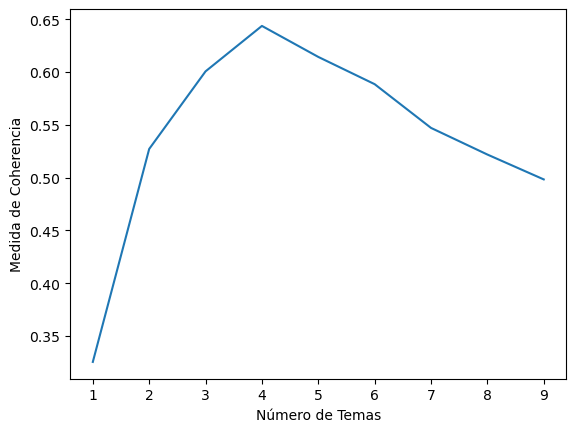

In [19]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_c)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Coherencia")
plt.show()

La medida de coherencia sugiere que hay 4 tipos de temas en estas páginas, visualicemos entonces los resultados:

In [20]:
lda_model_opt = LdaMulticore(corpus = corpus,
    id2word = dictionary,
    num_topics = 4,
    random_state=123)
pyLDAvis.enable_notebook()
LDA_visualization = gensimvis.prepare(lda_model_opt, corpus, dictionary)
LDA_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.028882 -0.003355       1        1  32.329304
1     -0.009191 -0.015617       2        1  27.165337
2     -0.003162  0.019973       3        1  22.827171
3     -0.016530 -0.001000       4        1  17.678188, topic_info=         Term        Freq       Total Category  logprob  loglift
269     freud  353.000000  353.000000  Default  30.0000  30.0000
70     hombre  219.000000  219.000000  Default  29.0000  29.0000
89   historia   81.000000   81.000000  Default  28.0000  28.0000
7     chomsky  269.000000  269.000000  Default  27.0000  27.0000
104     frase  100.000000  100.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
48        ano   19.039213  121.243122   Topic4  -4.9196  -0.1185
97       vida   17.251641   94.202115   Topic4  -5.0182   0.0353
22       idea   18.832809  144.294367   Topic4  -4.9305  -0.3034
269     freud   20.411852  353.897593   Topic4  -4.8500  -1.1201
28      mente   17.370706  149.650629   Topic4  -5.0113  -0.4207

[242 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
82        1  0.286670     amigo
82        2  0.191114     amigo
82        3  0.350375     amigo
82        4  0.159261     amigo
48        1  0.412395       ano
...     ...       ...       ...
63        4  0.188893     visto
292       1  0.304262  voltaire
292       2  0.258336  voltaire
292       3  0.203798  voltaire
292       4  0.232502  voltaire

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

Los resultados sugieren que hay 4 tipos de temas en estas páginas. Los 3 encontrados anteriormente, y páginas que hablan sobre estos 3 autores simultáneamente.

Es importante destacar que la medida de coherencia  no es sólo del tema en sí, sino también del conjunto de datos que se utiliza como referencia. Asimismo, parte de la literatura suele favorecerla ya que lleva a mejor interpretabilidad que otras medidas.

#### Medida de Perplejidad

Otra de las medidas utilizadas, es la medida de Perplejidad. A diferencia de la medida de coherencia lo que buscaremos es minimizar la perplejidad.

Esta medida calcula el número de palabras diferentes que son igualmente probables a seguir a cualquier palabra dada. Para aclarar qué queremos decir con esto, consideremos un ejemplo con 2 palabras: *el* y *anunciar*. La palabra *el* puede anteceder a una gran cantidad de palabras de igual probabilidad, mientras que el número de palabras de igual probabilidad que anteceden a *anunciar* será relativamente menor. 

La idea intuitiva es que palabras que, en promedio, pueden ir seguidas de un menor número de palabras de igual probabilidad, son más específicas y por lo tanto  pueden estar más estrechamente vinculadas a los tópicos. Entonces puntuaciones más bajas de perplejidad implican mejores modelos de lenguaje.

El cálculo es sencillo usando  [gensim](https://radimrehurek.com/gensim/index.html); ya que tanto [LDAModel](https://radimrehurek.com/gensim/models/ldamodel.html?highlight=ldamodel#module-gensim.models.ldamode)  como  [LdaMulticore](https://radimrehurek.com/gensim/models/ldamulticore.html) retornan el límite por palabra de la verosimilitud, por lo que para convertirlo en perplejidad necesitamos hacer $perplejidad=2^{(-limite)}$:

In [21]:
np.exp2(-lda_model_opt.log_perplexity(corpus))

47.5566784385558

Dado que nos interesa minimizar esta perplejidad comparemos esta medida para distinto números de temas. Crearemos entonces una función similar a la que construimos en la sección anterior:

In [22]:
def perplejidad_ntemas(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    perplejidad_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        perplejidad_values.append(np.exp2(-model.log_perplexity(corpus)))

    return model_list, perplejidad_values

In [23]:
modelos, valores_p = perplejidad_ntemas(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

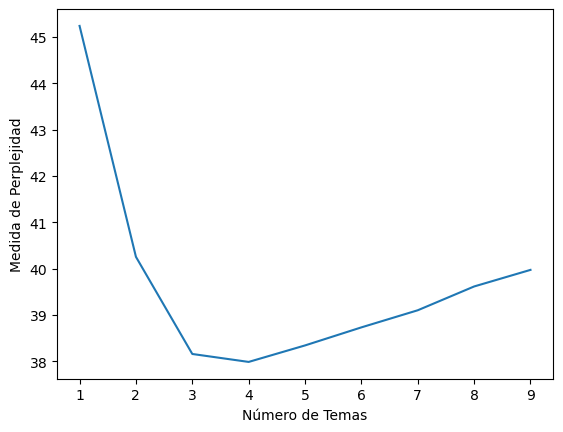

In [24]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_p)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Perplejidad")

plt.show()

Tenemos entonces un resultado análogo al anterior. En este caso ambos indicadores coinciden, pero a priori esto no tiene que ser así. En la práctica se tienden a utilizar ambos e indican el rango de posibles valores. Por esta razón, es recomendable calcular los 2 y en función de los resultados unidos al conocimiento del investigador decidir. 

## Consideraciones Finales

Cuando queremos extraer información de una colección de documentos, el modelado de temas o tópicos es un enfoque que puede ser potencialmente útil, ya que proporciona información sobre la estructura subyacente de los documentos. 

En este sentido los modelos de temas se pueden usar para predecir los temas que pertenecen a documentos no vistos. Si vamos a hacer predicciones, es importante reconocer que los modelos de temas sólo conocen las palabras que se usan para entrenarlos. Es decir, si los documentos no vistos tienen palabras que no estaban en los datos de entrenamiento, el modelo no podrá procesar esas palabras incluso si se vinculan a uno de los temas identificados en los datos de entrenamiento. Debido a este hecho, los modelos de temas tienden a usarse más para el análisis exploratorio y la inferencia que para la predicción.

Cuando se analiza el modelado de temas, es importante reforzar continuamente el hecho de que los grupos de palabras que representan los temas no están relacionados conceptualmente; están relacionados solo por proximidad. La proximidad frecuente de ciertas palabras en los documentos es suficiente para definir temas debido a que estamos asumiendo que todas las palabras en el mismo documento están relacionadas.

Sin embargo, esta suposición puede no ser cierta o las palabras pueden ser demasiado genéricas para formar temas coherentes. La interpretación de temas abstractos implica equilibrar las características innatas de los datos de texto con las agrupaciones de palabras generadas. Los datos de texto, y el lenguaje en general, son muy variables, complejos y contextuales, lo que significa que cualquier resultado generalizado debe interpretarse con cautela.

Es importante tener en cuenta también que la naturaleza ruidosa de los datos de texto puede hacer que los modelos de tópico asignen palabras no relacionadas con uno de los temas a ese tópico en particular. Esto no es necesariamente una falla en el modelo. En cambio, es una característica que, dados datos ruidosos, el modelo podría extraer peculiaridades de los datos que podrían afectar negativamente los resultados. Las correlaciones espurias podrían ser el resultado de cómo, dónde o cuándo se recopilaron los datos. 

Esto no es para minimizar o invalidar los resultados del modelo. Dados documentos cuidadosamente limpios y una cantidad adecuada de temas, las agrupaciones de palabras, como vimos, pueden ser una buena guía sobre lo que contiene un corpus y pueden incorporarse de manera efectiva en sistemas de datos más grandes como ser los sistemas de recomendación vistos en este módulo.

## Referencias

- Banik, R. (2018). Hands-on recommendation systems with Python: start building powerful and personalized, recommendation engines with Python. Packt Publishing Ltd.

- Blei, D. M., Jordan, M. I., &; Ng, A. Y. (2003). Latent Dirichlet Allocation. JMLR.org, 3, 993–1022. https://doi.org/10.5555/944919.944937 

- Fradejas Rueda, J. M. (2020). Cuentapalabras. Estilometrıa y análisis de texto con R para filólogos.

- Hoffman, M., Bach, F., & Blei, D. (2010). Online learning for latent dirichlet allocation. advances in neural information processing systems, 23.

- Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.

- Patel, A. A. (2019). Hands-on unsupervised learning using Python: how to build applied machine learning solutions from unlabeled data. O'Reilly Media.

- Rehurek, R., & Sojka, P. (2011). Gensim–python framework for vector space modeling. NLP Centre, Faculty of Informatics, Masaryk University, Brno, Czech Republic, 3(2).

- Röder, M., Both, A., & Hinneburg, A. (2015). Exploring the space of topic coherence measures. In Proceedings of the eighth ACM international conference on Web search and data mining (pp. 399-408).

# Información de Sesión

In [25]:
import session_info

session_info.show(html=False)

-----
gensim              4.3.0
matplotlib          3.7.1
numpy               1.24.3
pandas              1.5.3
pyLDAvis            3.4.0
session_info        1.0.0
spacy               3.5.3
unidecode           NA
-----
IPython             8.12.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.3.2
notebook            6.5.4
-----
Python 3.11.3 (main, Apr 19 2023, 18:51:09) [Clang 14.0.6 ]
macOS-10.16-x86_64-i386-64bit
-----
Session information updated at 2023-08-01 10:38
